# Supervised Learning

Any machine learning problem can be assigned one of two broad classifications: Supervised learning and Unsupervised learning.

Supervised learning is where you have input variables $x$ and an output variable $y$ and you use an algorithm to learn the mapping function from the input to the output. $y$=$f(x)$
The variable types can be:
1. Numerical, real number measurements (usually quantitative).
2. Categorical, from a discrete set (often qualitative). E.g. {Spam, Not-spam}.
3. Ordinal, from a discrete set, without metric relation, but allows ranking. E.g. {first, second, third}

It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by the teacher. Learning stops when the algorithm achieves an acceptable level of performance.

Supervised learning problems can be further grouped into:

* __Regression__: A regression problem is when the output variable is a real value, such as “dollars” or “weight”.
* __Classification__: A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”.

Now, we will dive into Least-squares solution method for Linear Regression, Logistic Regression, and Support Vector Machines.

## Least-Squares Method

   The learning algorithm takes a training set and outputs $h$.<br>
    Hypothesis function $\hat{y}$ represented as $h_\theta(x) = 
          \theta_0 + \theta_1x$,<br>
    $\theta_i$: parameters<br>
    $\theta_0$: $y$-intersect<br>
    $\theta_1x$: gradient<br>
    $\alpha$: learning rate (greater = more aggressive)<br>
    
   The squared error cost function measures the accuracy of the 
    hypothesis using the average difference of each hypothesis taken
    from $(x_i, y_i)$:<br><br> $J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle 
    \sum_{i=1}^m \left ( \hat{y_{i}}- y_{i} \right)^2 = \dfrac 
    {1}{2m} \displaystyle \sum_{i=1}^m \left (h_\theta (x_{i}) 
    - y_{i} \right)^2$

   The mean of the squares is halved for convencience of computing the 
    gradient descent, as the derivative term of the square function will
    cancil out the 1/2 term. The goal is to minimise $J(\theta_0, \theta_1)$. The lowest 
    value for $J(\theta_1)$ is selected, which will return the 
    least difference (best fit).
    
    

![Linear regression of Wikipedia](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg)

### Gradient Descent:

Gradient Descent: find the quickest path to the local optimum. 
If univariate, there will be just one global optimum. This is used to
    estimate the parameters in the hypothesis function.

   Repeat until convergence:<br>$\theta_j := \theta_j - \alpha\frac {\partial}{\partial\theta_j} J(\theta_0, \theta_1)$


   Translates to:
<br>$\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x_{i}) - y_{i})$

$\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}((h_\theta(x_{i}) - y_{i})x_i)$

   The derivative refers to the direction taken by the gradient descent 
    (i.e. positive or negative slope direction).

   Need to simultaneously update $\theta_0$, $\theta_1$..., 
    $\theta_n$ by assigning the computed gradiant descents for 
    $j$=0,$j$=1...,$j$=n to each variable at the same time. If $\theta_0$ is 
    updated before $\theta_1$, the second computation will be using the newly 
    assigned value of $\theta_0$.

   With fixed $\alpha$, the derivative will naturally decrease, 
    taking smaller steps to reach the convergence. $\alpha$ can take 
    too many steps to converge if too low, or alternatively can 
    overshoot and diverge if too high. If already at convergence, 
    the derivative will be treated as 0 and no more calculations 
    will be made. 

Let's dive into the data!

## Logistic Regression

### Overview

Sigmoid function: $h_\theta(x) = g(\theta^Tx), \text{ where } 
  g(z) = \frac{1}{1+e^{-z}}$ \text{ and } $z: \mathbb{R}$

  So, $h_\theta^{(x)} = \frac{1}{1+e^{-\theta^Tx}}$

  Interpretation: $h_\theta(x)$ = 0.7 = 70\% chance of positive outcome.

  $h_\theta(x) = P(y=1|x;\theta)$ i.e. the probability that y=1, given x
  parameterised by $\theta$.

  $P(y=0|x;\theta) + P(y=1|x;\theta) = 1$

  Predicts $y=1$ when $h_\theta(x) \geq 0.5$, or when $\theta^Tx \geq 0$

  Decision boundaries can be linear and non-linear. They are defined
  by the chosen theta.

### Cost Functions

Using logistic regression cost function returns a non-convex function: not
  guaranteed to converge to global minimum.

  $J(\theta) = \frac{1}{m} \displaystyle\sum_{i=1}^{m} \text{Cost}
  (h_\theta(x^{(i)}),y^{(i)})$
  
  Cost$(h_\theta(x^{(i)}, y^{(i)}) = \begin{cases}
    -\log(h_\theta(x)) \text{ if } y=1\\
    -\log(1-h_\theta(x)) & \text{if } y=0 \end{cases}$

  If $y=1, h_\theta(x)\rightarrow0$ pays a higher cost.\\ 
  If $y=0, h_\theta(x)\rightarrow1$ pays a higher cost.

  Simplified: Cost$(h_\theta(x),y) = -y\log(h_\theta(x)) 
  - (1-y)\log(1-h_\theta(x))$

 If $y=1$, the second half of the cost function is ignored.<br>
  If $y=0$, the first half of the cost function is ignored.

 This method is derived from maximum likelihood estimation.



### Gradient Descent:

$J(\theta) = -\frac{1}{m}[\displaystyle\sum_{i=1}^m y^{(i)}\log h_\theta(x^{(i)}) + (1y^{(i)})\log(1h_\theta(x^{(i)}))]$ $\min_\theta J(\theta):$

 $\text{Repeat} \{\hspace{1em} \theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta)\\
  \hspace{1em} \}  \hspace{1em}$ (simultaneously update all $\theta_j$) 

 $\frac{\partial}{\partial\theta_j}J(\theta) = \displaystyle\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$

   The difference between linear and logistic regression gradient descent is that the definition of $h_\theta^{(x)}$ is now equal to 
    $\frac{1}{1+e^{-\theta^Tx}}$.

   

## Logistic Regression Example:

In [1]:
# import required python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy as sci
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score, accuracy_score, recall_score, precision_score
plt.style.use('ggplot')

In [2]:
%matplotlib inline

Here, we run an example of logistic regression using random numbers for inputs and an output defined by where these points lie on a line in a 2D plane.

#### Create random input of X1 & X2, and and labels (1 or 0) separated by line $0 = 4*x_1 + 9*x_2$

We split the data into 50% 'training' and 50% 'testing' since we're not tuning learning rate or any other learning related parameters (see more on this in notes at end). We hold out some 'test' data to see how well the model should generalize from the data we've been given, provided our data models the distribution of x1, x2, and y in the 'real world'. Here, we're only using 50 samples, and a split of 50/50 train/test so we can see the effect of slight differences in training and testing distributions on how well the model generalizes. Generally you should use more of your data for training than testing, but reserve at least 20% for testing. 

In [3]:
# Create Data
n = 50
np.random.seed(42)
x1 = [10 * np.random.random() - 5 for i in range(n)]
x2 = [10 * np.random.random() - 5 for i in range(n)]
y = [x1[i] * 4 + x2[i] * 9 for i in range(n)]
y = np.array([0 if y[i] < 0 else 1 for i in range(n)])
x1 = np.array(x1)
x2 = np.array(x2)
X = np.c_[x1,x2]
# 50% of data used for training
pct_use = 0.50
split_pt = np.ceil(pct_use*n).astype('int64')
X_train = X[0:split_pt, :]
y_train = y[0:split_pt]
X_test = X[split_pt:100, :]
y_test = y[split_pt:100]

In [4]:
# examine data
X_train[0:5]

array([[-1.25459881,  4.69584628],
       [ 4.50714306,  2.75132823],
       [ 2.31993942,  4.39498942],
       [ 0.98658484,  3.9482735 ],
       [-3.4398136 ,  0.97899979]])

In [5]:
y_train[0:5]

array([1, 1, 1, 1, 0])

#### Run Logistic Regression

In [6]:
# run logistic regression
lr = LogisticRegression(C=1, random_state = 24)
lr.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=24, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
lr.coef_,lr.intercept_, lr.intercept_scaling

(array([[0.41940932, 1.40651139]]), array([-1.34947502]), 1)

#### Training Data

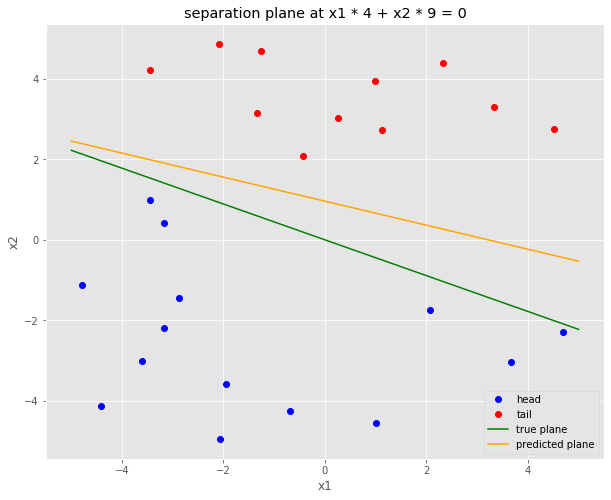

In [8]:
plt.rc('figure', figsize=(10,8))
y_train_pred = lr.predict(X_train)
pos = np.where(y_train_pred == 0)
neg = np.where(y_train_pred == 1)
plt.plot(X_train[pos, 0].flatten(), X_train[pos, 1].flatten(),'o', color = 'blue', label = 'head')
plt.plot(X_train[neg, 0].flatten(), X_train[neg, 1].flatten(),'o', color = 'red', label = 'tail')
plt.xlabel('x1')
plt.ylabel('x2')

a = np.linspace(-5, 5, 20)
b = -4.0 * a / 9
c = -(lr.coef_[0][0] * a + lr.intercept_[0]) / lr.coef_[0][1]
plt.plot(a, b, '-', label='true plane', color = 'green')
plt.plot(a, c, '-', label='predicted plane', color = 'orange')
plt.legend()
_ = plt.title('separation plane at x1 * 4 + x2 * 9 = 0')

Here, none of the samples should be misclassified. In real life, you may get some classification error as things are rarely perfectly separable by a line or plane.

#### Test Data

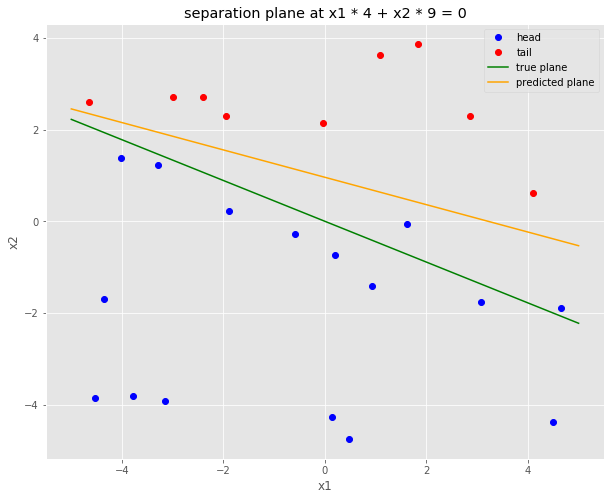

In [9]:
plt.rc('figure', figsize=(10,8))
y_test_pred = lr.predict(X_test)
pos = np.where(y_test_pred == 0)
neg = np.where(y_test_pred == 1)
plt.plot(X_test[pos, 0].flatten(), X_test[pos, 1].flatten(),'o', color = 'blue', label = 'head')
plt.plot(X_test[neg, 0].flatten(), X_test[neg, 1].flatten(),'o', color = 'red', label = 'tail')
plt.xlabel('x1')
plt.ylabel('x2')

a = np.linspace(-5, 5, 20)
b = -4.0 * a / 9
c = -(lr.coef_[0][0] * a + lr.intercept_[0]) / lr.coef_[0][1]
plt.plot(a, b, '-', label='true plane', color = 'green')
plt.plot(a, c, '-', label='predicted plane', color = 'orange')
plt.legend()
_ = plt.title('separation plane at x1 * 4 + x2 * 9 = 0')

When we look at the test data, we have a few datapoints with an incorrectly predicted label. You can play around with this notebook with the pct_used variable (switch from 0.50 to 0.20) and you'll see that as you use a higher percentage of data, the better the model will do, and the lower the percentage, the worse it will do in general. Note that you should reserve at least about 20% of your data for testing so that you have enough samples to be characteristic of the data distribution. Also note that if you set the variable n to a small number (i.e. total number of samples), while keeping percentage of samples used for testing constant, you will most likely see a decrease in accuracy.


## Other Notes (Read if Interested)

There are topics we didn't delve into today involved in assessing model training, such as validation error and test error. Usually in a supervised learning setup, you may have extra parameters (called hyperparameters) that control the training of your model, such as learning rate ($\alpha$). For training, you train on perhaps 60% of your data and holding out an extra 20% (validation data) for seeing how well your model does under the given hyperparameter settings. Once you've optimized hyperparameters (i.e. found the hyperparameters that result in the training of the model with minimal error on the validation data), you can retrain your model on the training data + validation data (accounts for 80% of data) and test your final model on the 20% remaining data (test data). The percentages given aren't hard and fast rules but general rules of thumb

More on that in [notes](https://www.cs.toronto.edu/~mren/teach/csc411_19s/lec/lec02.pdf) publicly available from the University of Toronto.